# [Plot 그리기]

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data['data'], columns=['sepal_length', 'sepal_width',
                                        'petal_length', 'petal_width'])
df['target'] = data['target']

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## 1. matplotlib

### 기본 plot

- fig 구조
    - fig = plt.figure()
    - fig.suptitle('')
    - fig.tight_layout()


- axes 구조
    - axes = fig.add_subplot()
    - axes.plot()
    - axes.set_title('')
    - axes.set_xlabel('')
    - axes.set_ylabel('')


- axes.hist(데이터, bins=10)
- axes.scatter(x=데이터1, y=데이터2, s=범주데이터 * 10, c=데이터, alpha=0.5)
    - s: size, c: color, alpha: 투명도
- axes.boxplot([df[df['target'] == 0]['petal_length'], df[df['target'] == 1]['petal_length']], labels=['0','1'])


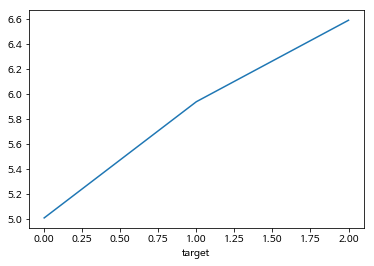

In [6]:
group1 = df.groupby('target')['sepal_length'].mean()
group1.plot()

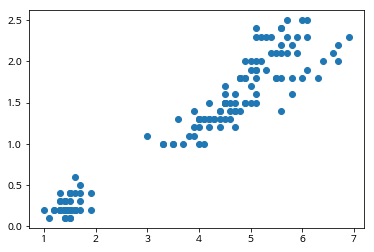

In [14]:
plt.plot(df['petal_length'], df.petal_width, 'o')

## 2. seaborn

### 기본 plot

- ax = plt.subplots()
- ax.set_title('')
- ax.set_xlabel('')
- ax.set_ylabel('')


- sns.distplot(데이터, kde=False, hist=False, rug=True)
- sns.countplot('범주형데이터', data=데이터)
- sns.lmplot(x='데이터', y='데이터', data=데이터, hue='범주형', fit_reg=False, scatter_kws={'s': 데이터 * 10}, markers['o', 'x'])
- sns.regplot(x='데이터', y='데이터', data=데이터, fit_reg=False)
- sns.jointplot(x='데이터', y='데이터', data=데이터, kind='hex')
    - .set_axis_labels(xlabel='', ylabel='')
    - .fig.suptitle('', fontsize=10, y=1.03)
- sns.kdeplot(data=데이터1, data2=데이터2, shade=True)
- sns.barplot(x='범주형', y='데이터', data=데이터)
- sns.boxplot(x='데이터', y='데이터', data=데이터)
- sns.violinplot(x='데이터', y='데이터', hue='범주형', data=데이터, split=True))


- 스타일 설정
- sns.set_style('whitegrid') # darkgrid, dark, white, ticks
- fig, ax = plt.subplots()
- ax = sns.violinplot(x='범주형', y='데이터', hue='범주형', data=데이터, split=True)


- 관계 그래프
    - fig = sns.pairplot(데이터, hue='범주형')
    - pair_grid = sns.PairGrid(데이터)
    - pair_grid = pair_grid.map_upper(sns.regplot)
    - pair_grid = pair_grid.map_lower(sns.kdeplot)
    - pair_grid = pair_grid.map_diag(sns.distplot, rug=True)
    - plt.show()

### lmplot()으로 그룹별 그래프 만들기

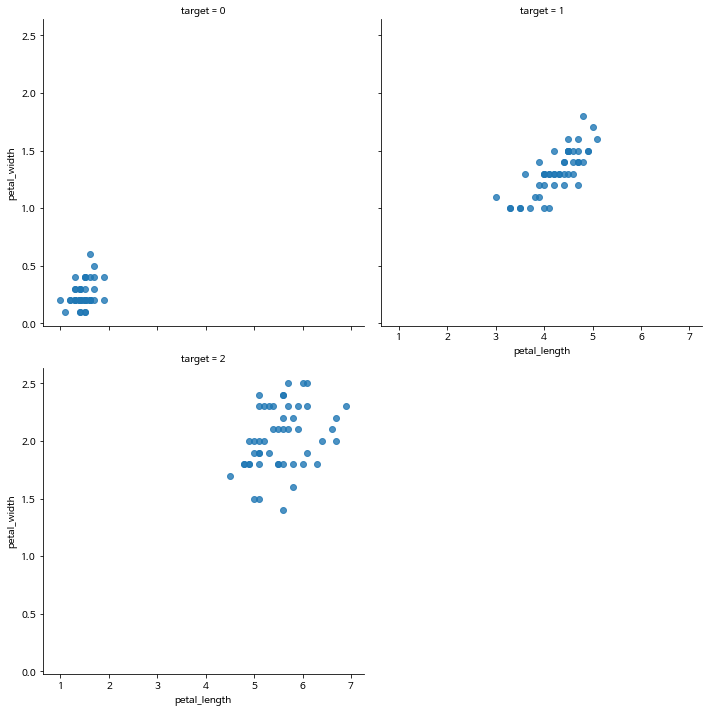

In [42]:
sns.lmplot(x='petal_length', y='petal_width', data=df, fit_reg=False,
           col='target', col_wrap=2)

### FacetGrid로 그룹별 그래프 만들기

C:\Users\JH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


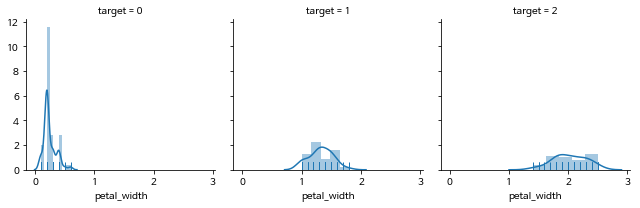

In [46]:
facet = sns.FacetGrid(df, col='target')

facet.map(sns.distplot, 'petal_width', rug=True)

### FacetGrid - 한 가지 범주

facet = sns.FacetGrid(tips, col='day', hue='sex')

facet = facet.map(plt.scatter, 'total_bill', 'tip')

facet = facet.add_legend()

### FacetGrid - 두 가지 범주

facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex')

facet.map(plt.scatter, 'total_bill', 'tip')

C:\Users\JH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


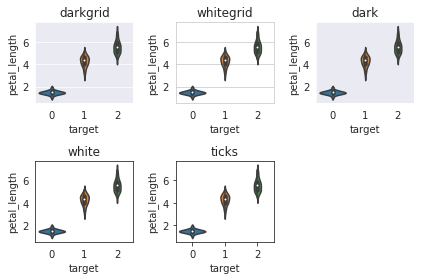

In [6]:
fig = plt.figure()

seaborn_styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']

for idx, style in enumerate(seaborn_styles):
    plot_position = idx + 1
    with sns.axes_style(style):
        ax = fig.add_subplot(2, 3, plot_position)
        violin = sns.violinplot(x='target', y='petal_length', data=df, ax=ax)
        violin.set_title(style)

fig.tight_layout()

## 3. 간편하게 그래프 그리기

- ax = plt.subplots()


- ax = 데이터.plot.hist(alpha=, bins=, ax=ax)
- ax = 데이터.plot.kde()


- fig, ax = plt.subplots()
- ax = 데이터.scatter(x='데이터', y='데이터', ax=ax)
- ax = 데이터.plot.hexbin(x='데이터', y='데이터', gridsize=10, ax=ax)
- ax = 데이터.plot.box(ax=ax)